## Importing Modules

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import tensorflow as tf

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [2]:
df = pd.read_csv('telco-churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Preprocessing

In [5]:
df.drop('customerID', axis=1, inplace=True)

In [6]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Encoding

In [7]:
def get_uniques(df, columns):
    return {column: list(df[column].unique()) for column in columns}

In [8]:
def get_categorical_columns(df):
    return [column for column in df.columns if df.dtypes[column] == 'object']

In [9]:
get_uniques(df, get_categorical_columns(df))

{'gender': ['Female', 'Male'],
 'Partner': ['Yes', 'No'],
 'Dependents': ['No', 'Yes'],
 'PhoneService': ['No', 'Yes'],
 'MultipleLines': ['No phone service', 'No', 'Yes'],
 'InternetService': ['DSL', 'Fiber optic', 'No'],
 'OnlineSecurity': ['No', 'Yes', 'No internet service'],
 'OnlineBackup': ['Yes', 'No', 'No internet service'],
 'DeviceProtection': ['No', 'Yes', 'No internet service'],
 'TechSupport': ['No', 'Yes', 'No internet service'],
 'StreamingTV': ['No', 'Yes', 'No internet service'],
 'StreamingMovies': ['No', 'Yes', 'No internet service'],
 'Contract': ['Month-to-month', 'One year', 'Two year'],
 'PaperlessBilling': ['Yes', 'No'],
 'PaymentMethod': ['Electronic check',
  'Mailed check',
  'Bank transfer (automatic)',
  'Credit card (automatic)'],
 'TotalCharges': ['29.85',
  '1889.5',
  '108.15',
  '1840.75',
  '151.65',
  '820.5',
  '1949.4',
  '301.9',
  '3046.05',
  '3487.95',
  '587.45',
  '326.8',
  '5681.1',
  '5036.3',
  '2686.05',
  '7895.15',
  '1022.95',
  '7382

In [10]:
df['TotalCharges'].astype(np.float)

ValueError: could not convert string to float: ''

In [21]:
sorted(df['TotalCharges'].unique())

[18.8,
 18.85,
 18.9,
 19.0,
 19.05,
 19.1,
 19.15,
 19.2,
 19.25,
 19.3,
 19.4,
 19.45,
 19.5,
 19.55,
 19.6,
 19.65,
 19.7,
 19.75,
 19.8,
 19.85,
 19.9,
 19.95,
 20.0,
 20.05,
 20.1,
 20.15,
 20.2,
 20.25,
 20.3,
 20.35,
 20.4,
 20.45,
 20.5,
 20.55,
 20.6,
 20.65,
 20.7,
 20.75,
 20.8,
 20.85,
 20.9,
 20.95,
 21.0,
 21.05,
 21.1,
 23.45,
 24.0,
 24.05,
 24.2,
 24.25,
 24.4,
 24.45,
 24.6,
 24.7,
 24.75,
 24.8,
 24.9,
 25.0,
 25.05,
 25.1,
 25.15,
 25.2,
 25.25,
 25.3,
 25.35,
 25.4,
 25.7,
 25.75,
 25.8,
 25.85,
 27.55,
 28.3,
 29.15,
 29.7,
 29.85,
 29.9,
 29.95,
 30.2,
 30.5,
 30.55,
 31.2,
 31.35,
 31.55,
 31.9,
 32.7,
 33.2,
 33.6,
 33.7,
 34.7,
 34.75,
 34.8,
 35.0,
 35.05,
 35.1,
 35.25,
 35.45,
 35.55,
 35.75,
 35.85,
 35.9,
 36.45,
 36.55,
 36.8,
 37.2,
 38.0,
 38.15,
 38.25,
 38.45,
 38.7,
 38.8,
 39.25,
 39.3,
 39.65,
 39.8,
 39.85,
 40.1,
 40.2,
 40.25,
 40.9,
 41.2,
 41.85,
 42.45,
 42.7,
 42.9,
 43.15,
 43.3,
 43.8,
 43.85,
 43.95,
 44.0,
 44.05,
 44.1,
 44.15,
 44.2,


In [22]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.NaN)

In [23]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [24]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

In [25]:
df['TotalCharges'].dtypes

dtype('float64')

In [26]:
df['TotalCharges'] = df['TotalCharges'].astype(np.float)

In [27]:
df['TotalCharges'].dtypes

dtype('float64')

In [28]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

In [29]:
df['MultipleLines'] = df['MultipleLines'].replace('No phone service', 'No')

df[['OnlineSecurity', 'OnlineBackup',     'DeviceProtection', 'TechSupport', 
    'StreamingTV', 'StreamingMovies']] = df[['OnlineSecurity', 'OnlineBackup', 
                                            'DeviceProtection', 'TechSupport', 
                                            'StreamingTV', 'StreamingMovies']].replace('No internet service', 'No')

In [30]:
get_uniques(df, get_categorical_columns(df))

{'gender': ['Female', 'Male'],
 'Partner': ['Yes', 'No'],
 'Dependents': ['No', 'Yes'],
 'PhoneService': ['No', 'Yes'],
 'MultipleLines': ['No', 'Yes'],
 'InternetService': ['DSL', 'Fiber optic', 'No'],
 'OnlineSecurity': ['No', 'Yes'],
 'OnlineBackup': ['Yes', 'No'],
 'DeviceProtection': ['No', 'Yes'],
 'TechSupport': ['No', 'Yes'],
 'StreamingTV': ['No', 'Yes'],
 'StreamingMovies': ['No', 'Yes'],
 'Contract': ['Month-to-month', 'One year', 'Two year'],
 'PaperlessBilling': ['Yes', 'No'],
 'PaymentMethod': ['Electronic check',
  'Mailed check',
  'Bank transfer (automatic)',
  'Credit card (automatic)'],
 'Churn': ['No', 'Yes']}

In [31]:
binary_features = ['gender', 'Partner', 'Dependents', 'PhoneService', 
                    'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 
                    'DeviceProtection', 'TechSupport', 'StreamingTV',
                    'StreamingMovies', 'PaperlessBilling']

ordinal_features = ['InternetService', 'Contract']

nominal_features = ['PaymentMethod']

target_column = 'Churn'

In [32]:
internet_order = ['No', 'DSL', 'Fiber optic']
contract_order = ['Month-to-month', 'One year', 'Two year']

In [33]:
def binary_encode(df, column, positive_value):
    df = df.copy()
    df[column] = df[column].apply(lambda x: 1 if x == positive_value else 0)
    return df

def ordinal_encode(df, column, ordering):
    df = df.copy()
    df[column] = df[column].apply(lambda x: ordering.index(x))
    return df


def onehot_encode(df, column):
    df = df.copy()
    dummies = pd.get_dummies(df[column])
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)
    return df

In [34]:
df = binary_encode(df, 'gender', 'Male')

yes_or_no_features = ['Partner', 'Dependents', 'PhoneService', 
                    'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 
                    'DeviceProtection', 'TechSupport', 'StreamingTV',
                    'StreamingMovies', 'PaperlessBilling']

for feature in yes_or_no_features:
    df = binary_encode(df, feature, 'Yes')

df = ordinal_encode(df, 'InternetService', internet_order)
df = ordinal_encode(df, 'Contract', contract_order)

df = onehot_encode(df, 'PaymentMethod')

In [35]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
0,0,0,1,0,1,0,0,1,0,1,...,0,0,1,29.85,29.85,No,0,0,1,0
1,1,0,0,0,34,1,0,1,1,0,...,0,1,0,56.95,1889.50,No,0,0,0,1
2,1,0,0,0,2,1,0,1,1,1,...,0,0,1,53.85,108.15,Yes,0,0,0,1
3,1,0,0,0,45,0,0,1,1,0,...,0,1,0,42.30,1840.75,No,1,0,0,0
4,0,0,0,0,2,1,0,2,0,0,...,0,0,1,70.70,151.65,Yes,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,1,1,0,...,1,1,1,84.80,1990.50,No,0,0,0,1
7039,0,0,1,1,72,1,1,2,0,1,...,1,1,1,103.20,7362.90,No,0,1,0,0
7040,0,0,1,1,11,0,0,1,1,0,...,0,0,1,29.60,346.45,No,0,0,1,0
7041,1,1,1,0,4,1,1,2,0,0,...,0,0,1,74.40,306.60,Yes,0,0,0,1


In [37]:
df = binary_encode(df, 'Churn', 'Yes')

In [38]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
0,0,0,1,0,1,0,0,1,0,1,...,0,0,1,29.85,29.85,0,0,0,1,0
1,1,0,0,0,34,1,0,1,1,0,...,0,1,0,56.95,1889.50,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,1,...,0,0,1,53.85,108.15,1,0,0,0,1
3,1,0,0,0,45,0,0,1,1,0,...,0,1,0,42.30,1840.75,0,1,0,0,0
4,0,0,0,0,2,1,0,2,0,0,...,0,0,1,70.70,151.65,1,0,0,1,0


In [39]:
pd.set_option('max_columns', None)

In [40]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,29.85,29.85,0,0,0,1,0
1,1,0,0,0,34,1,0,1,1,0,1,0,0,0,1,0,56.95,1889.50,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,1,0,0,0,0,0,1,53.85,108.15,1,0,0,0,1
3,1,0,0,0,45,0,0,1,1,0,1,1,0,0,1,0,42.30,1840.75,0,1,0,0,0
4,0,0,0,0,2,1,0,2,0,0,0,0,0,0,0,1,70.70,151.65,1,0,0,1,0


## Splitting and Scalling

In [43]:
y = df['Churn']
X = df.drop('Churn', axis=1)

In [44]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Training

In [46]:
X.shape

(7043, 22)

In [47]:
y.sum() / len(y)

0.2653698707936959

In [48]:
inputs = tf.keras.Input(shape=(22,))
x = tf.keras.layers.Dense(64, activation='relu')(inputs)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs = inputs, outputs = outputs)
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[tf.keras.metrics.AUC(name='auc')]
)

batch_size = 64
epochs = 100

history = model.fit(
    X_train, 
    y_train,
    validation_split= 0.2,
    batch_size = batch_size,
    epochs = epochs,
    callbacks=[tf.keras.callbacks.ReduceLROnPlateau()],
    verbose=0
)

## Results

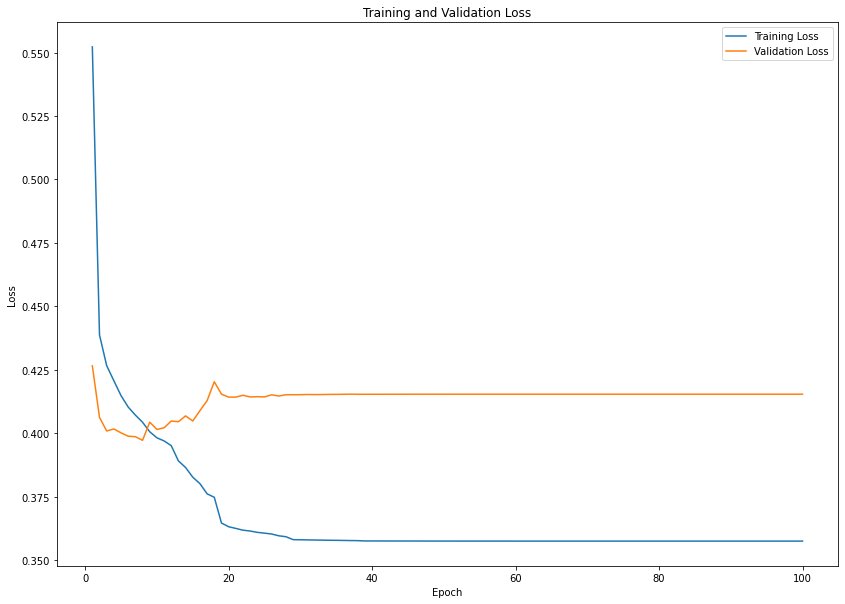

In [50]:
plt.figure(figsize=(14, 10))

epochs_range = range(1, epochs + 1)
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs_range, train_loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')

plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Without callback

In [51]:
inputs = tf.keras.Input(shape=(22,))
x = tf.keras.layers.Dense(64, activation='relu')(inputs)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs = inputs, outputs = outputs)
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[tf.keras.metrics.AUC(name='auc')]
)

batch_size = 64
epochs = 100

history = model.fit(
    X_train, 
    y_train,
    validation_split= 0.2,
    batch_size = batch_size,
    epochs = epochs,
    # callbacks=[tf.keras.callbacks.ReduceLROnPlateau()],
    verbose=0
)

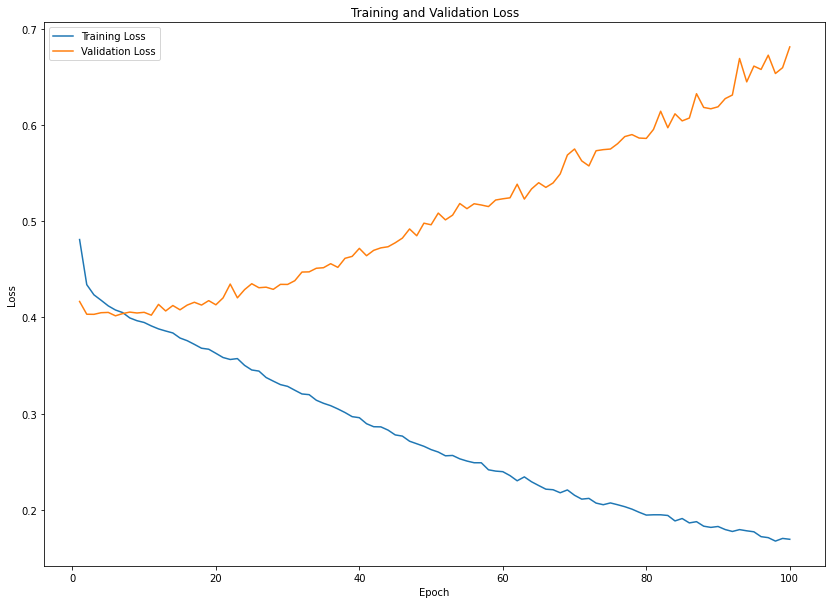

In [52]:
plt.figure(figsize=(14, 10))

epochs_range = range(1, epochs + 1)
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs_range, train_loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')

plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [53]:
np.argmin(val_loss)

5

## Change epochs to 5

In [54]:
inputs = tf.keras.Input(shape=(22,))
x = tf.keras.layers.Dense(64, activation='relu')(inputs)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs = inputs, outputs = outputs)
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[tf.keras.metrics.AUC(name='auc')]
)

batch_size = 64
epochs = 5

history = model.fit(
    X_train, 
    y_train,
    validation_split= 0.2,
    batch_size = batch_size,
    epochs = epochs,
    # callbacks=[tf.keras.callbacks.ReduceLROnPlateau()],
    verbose=0
)

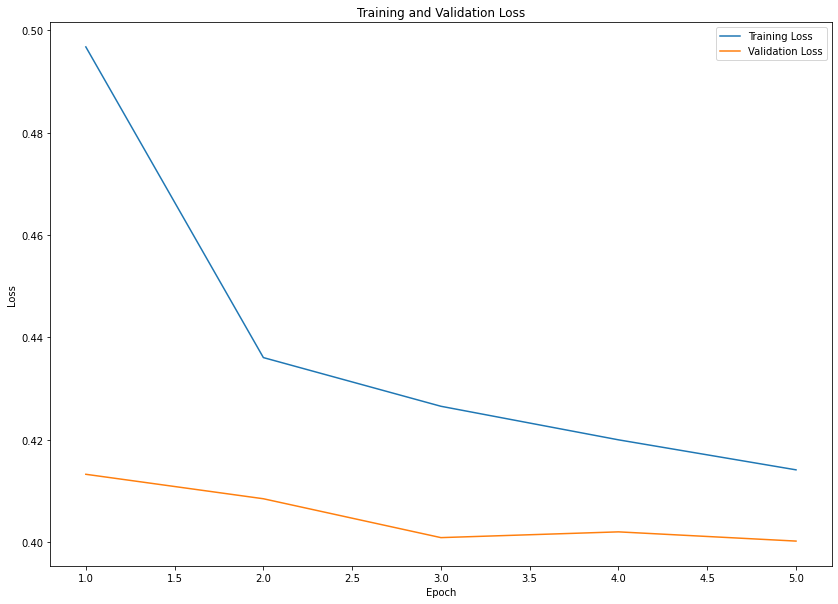

In [55]:
plt.figure(figsize=(14, 10))

epochs_range = range(1, epochs + 1)
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs_range, train_loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')

plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [56]:
np.argmin(val_loss)

4

In [57]:
model.evaluate(X_test, y_test)

67/67 [==============================] - 0s 1ms/step - loss: 0.4229 - auc: 0.8358


[0.4228554368019104, 0.8358131647109985]